___
# Projeto 2 - Ciência dos Dados
Grupo: Bruno Besnosik, Eduardo Zetone, Enzo Del Manto, Guilherme Pinheiro

## Objetivo do projeto:

- Testar a possibilidade de prever o desempenho de um aluno, baseando-se em suas relações sociais e acadêmicas.
- O nosso target é quantitativo (G3), já que queremos prever uma informação numérica. 

In [400]:
# Importar bibliotecas necessárias
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from math import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
ax = plt.axes()
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
%matplotlib inline

In [401]:
# Abrir o dataset e converter em dataframe
df = pd.read_csv('data/student-mat.csv')

## Informações do dataset
- O dataset foi gerado a partir de um questionário feito com estudantes da disciplina matemática do ensino médio.   
- O arquivo contém informações pessoais dos estudantes, tanto sobre sua vida social e acadêmica, quanto sobre suas relações interfamiliares, amorosas e etc.

https://www.kaggle.com/uciml/student-alcohol-consumption

## Índice do dataset
- school - Escola do estudante (binário: 'GP' - Gabriel Pereira ou 'MS' - Mousinho da Silveira)
- sex - Gênero (binário: 'F' - feminino ou 'M' - masculino)
- age - Idade (numérico: de 15 até 22)
- address - Tipo de endereço (binário: 'U' - urbano ou 'R' - rural)
- famsize - Número de membros na família (binário: 'LE3' (0) - menor ou igual a 3 ou 'GT3' (1) - maior que 3)
- Pstatus - Estado de coabitação dos pais (binário: 'T' - Morando juntos ou 'A' - Morando separados)
- Medu - Nível de educação da mãe (numérico: 0 - Nenhuma, 1 - Ensino Primário (Quarto ano), 2 – Quinto ao nono ano, 3 – Ensino secundário ou 4 – Ensino Superior)
- Fedu - Nível de educação do pai (numérico: 0 - Nenhuma, 1 - Ensino Primário (Quarto ano), 2 – Quinto ao nono ano, 3 – Ensino secundário ou 4 – Ensino Superior)
- Mjob - Trabalho da mãe (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- Fjob - Trabalho do pai (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- reason - Razão de ter escolhido essa escola (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- guardian - Guardião Legal do estudante (nominal: 'mother', 'father' or 'other')
- traveltime -Tempo de viagem de casa até a escola (numérico: 1 - Até 15 minutos, 2 - 15 a 30 minutos, 3 - 30 minutos até 1 hora, or 4 - mais que 1 hora)
- studytime - Tempo de estudo semanal (numérico: 1 - Até 2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas, or 4 - mais que 10 horas)
- failures - Número de reprovamentos anteriores (numérico: n se 1<=n<3, caso contrário-4)
- schoolsup - Suporte educacional extra (binário: yes or no)
- famsup - Suporte educacional da família (binário: yes or no)
- paid - Se faz aulas particulares da disciplina (binário: yes or no)
- activities - Se faz atividades extra-curriculares (binário: yes or no)
- nursery - Se fez escola de enfermagem (binário: yes or no)
- higher - Se quer ter ensino superior (binário: yes or no)
- internet - Se tem acesso à internet em casa (binário: yes or no)
- romantic - Se está em um relacionamento amoroso (binário: yes or no)
- famrel - Qualidade das relações familiares (numérico: De 1 - muito ruins até 5 - excelentes)
- freetime - Tempo livre depois da escola (numérico: De 1 - pouco até 5 - muito)
- goout - Sair com os amigos (numérico: De 1 - pouco até 5 - muito)
- Dalc - Consumo de álcool em dia de semana (numérico: De 1 - baixo até 5 - elevado)
- Walc - Consumo de álcool no fim de semana (numérico: from 1 - baixo até 5 - elevado)
- health - Estado de saúde atual (numérico: De 1 - Muito ruim até 5 - Muito bom)
- absences - Número de faltas na escola (numérico: De 0 até 93)
- G1: Nota no primeiro semestre (númerico: De 0 até 20) 
- G2: Nota no segundo semestre (númerico: De 0 até 20)
- G3: Nota final (numérico: De 0 até 20, output target) 

In [402]:
#Variáveis numéricas
num_df = df.select_dtypes(include=[np.number]).columns
num_df

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

In [403]:
#Variáveis categóricas
cat_df = df.select_dtypes(exclude=[np.number]).columns
cat_df

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [404]:
#Variáveis númericas que são categóricas
num_to_cat = ['Medu','Fedu','famrel','freetime','goout','freetime','Dalc','Walc','health']

for coluna in num_to_cat:
    df[coluna] = df[coluna].astype('category')

for coluna in cat_df:
    df[coluna] = df[coluna].astype('category')
    


In [405]:
# Reassociando os tipos de variáveis 
num_df = df.select_dtypes(include=[np.number]).columns
cat_df = df.select_dtypes(exclude=[np.number]).columns

print('VARIÁVEIS NÚMERICAS:',num_df)
print('')
print('')
print('VARIÁVEIS CATEGÓRICAS:',cat_df)

VARIÁVEIS NÚMERICAS:

Index(['age', 'traveltime', 'studytime', 'failures', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')


VARIÁVEIS CATEGÓRICAS:

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health'],
      dtype='object')


# Análise dos dados
## Análise das variáveis numéricas

In [406]:
# Ver panorama dos dados
df.describe()

,age,traveltime,studytime,failures,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,1.448101,2.035443,0.334177,5.708861,10.908861,10.713924,10.415190
std,1.276043,0.697505,0.839240,0.743651,8.003096,3.319195,3.761505,4.581443
min,15.000000,1.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,1.000000,1.000000,0.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,1.000000,2.000000,0.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,2.000000,2.000000,0.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,3.000000,75.000000,19.000000,19.000000,20.000000


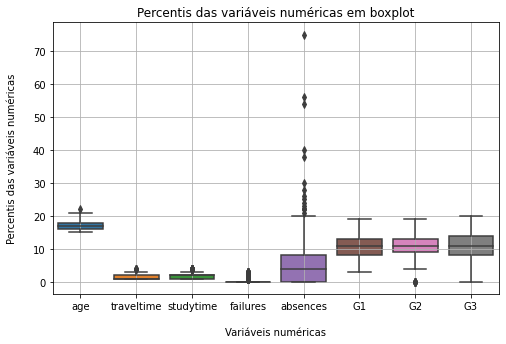

In [407]:
# Plotando o boxplot dos percentis das features numéricas
plt.figure(figsize=(8, 5))
sns.boxplot(data=df.loc[:,num_df])
plt.title('Percentis das variáveis numéricas em boxplot')
plt.xlabel('\nVariáveis numéricas')
plt.ylabel('Percentis das variáveis numéricas\n')
plt.grid(True)
plt.show()

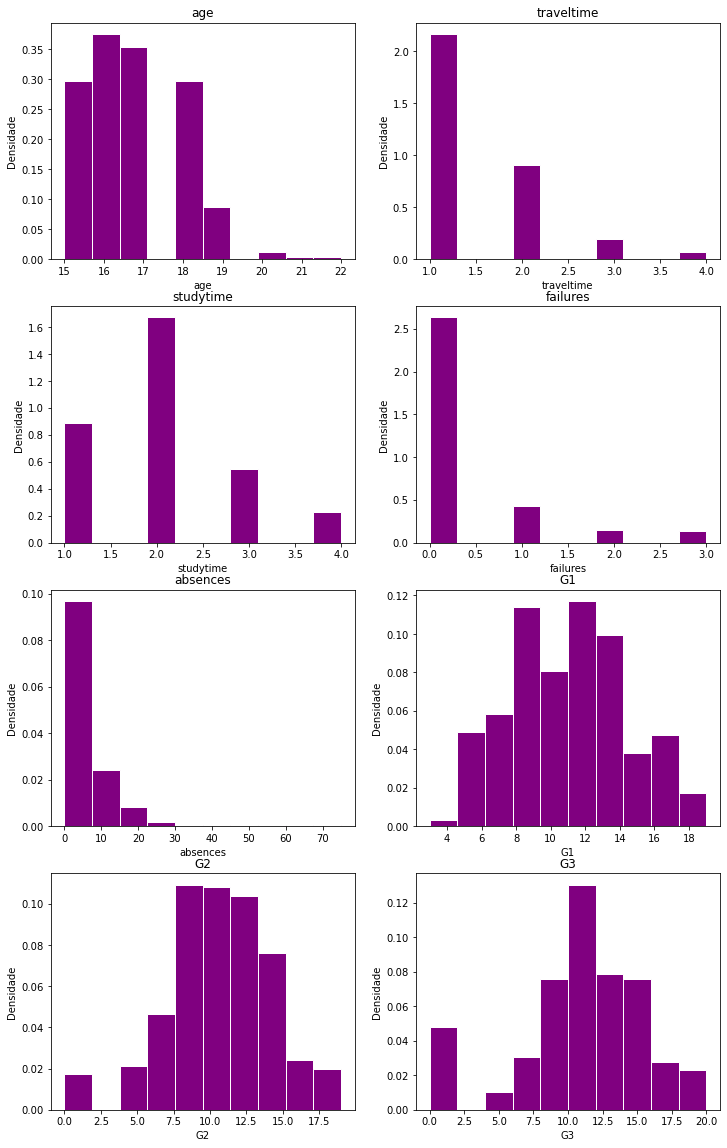

In [408]:
# Plotando histogramas de cada variável
plt.figure(figsize = (12,20))
for i in enumerate(num_df):
    plt.subplot(4,2,i[0]+1)
    plt.hist(df[i[1]], color='purple', edgecolor = 'white',density = True)
    plt.title(f'{i[1]}')
    plt.xlabel(i[1])
    plt.ylabel('Densidade')

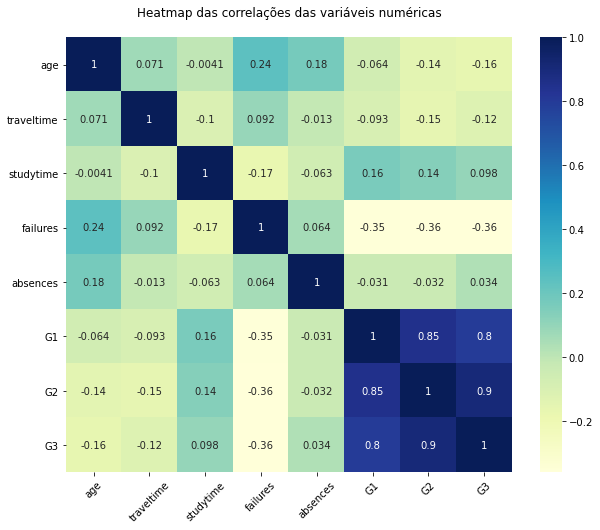

In [409]:
#Código que calcula a correlações das variáveis númericas, plotando resultados com um heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title('Heatmap das correlações das variáveis numéricas\n')
plt.show()